---
title: "ZK-Bootcamp - Homework 3 - Elliptic Curves"
date: 2025-06-24T00:00:00+00:00
author: Spoorthi Satheesha
layout: post
permalink: /zk-bootcamp-homework-3/
categories: Study
tags: [math, zk]
mathjax: true
excerpt: "Homework for Elliptic Curves of Rareskill's ZK Bootcamp"
seo_title: "ZK-Bootcamp - Homework 3 - Elliptic Curves"
seo_description: "Homework for Elliptic Curves of Rareskill's ZK Bootcamp"
---

#### Problem 1

Implement point addition 

In [37]:
def point_addition(p1, p2):
    assert p1 != p2, "Points must be different"
    x1, y1 = p1
    x2, y2 = p2

    assert x1 != x2, "X coordinates must be different"

    l = (y2 - y1) / (x2 - x1) 

    x3 = pow(l,2) - x1 - x2
    y3 = l*(x1 - x3) - y1
    p3 = (x3, y3)  
    return p3


In [ ]:
!python -m pip install numpy
!python -m pip install matplotlib

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def plot_elliptic_curve(a, b, points=None, xlim=(-3, 6), ylim=(-6, 16), title=None):
    """
    Plots the elliptic curve y^2 = x^3 + a*x + b and marks the given points.
    
    Args:
        a (float): Coefficient of x in the curve equation.
        b (float): Constant term in the curve equation.
        points (list of tuples): List of (x, y) points to mark on the curve.
        xlim (tuple): x-axis limits for the plot.
        ylim (tuple): y-axis limits for the plot.
        title (str): Title for the plot.
    """
    x = np.linspace(xlim[0], xlim[1], 800)
    y2 = x**3 + a*x + b
    mask = y2 >= 0
    x_real = x[mask]
    y_real = np.sqrt(y2[mask])

    plt.figure(figsize=(8,6))
    plt.plot(x_real, y_real, label=r"$y^2 = x^3 + {}x + {}$".format(a, b))
    plt.plot(x_real, -y_real, color='C0')  # negative branch

    if points:
        colors = ['red', 'green', 'blue', 'orange', 'purple']
        for idx, pt in enumerate(points):
            plt.scatter(*pt, color=colors[idx % len(colors)], label=f'P{idx+1} {pt}')

         # Draw line through first two points if at least two are given
        if len(points) >= 2:
            (x1, y1), (x2, y2) = points[0], points[1]
            if x1 != x2:
                m = (y2 - y1) / (x2 - x1)
                x_line = np.linspace(xlim[0], xlim[1], 200)
                y_line = m * (x_line - x1) + y1
                plt.plot(x_line, y_line, 'k--', label='Line through P1 and P2')
            else:
                # Vertical line
                plt.axvline(x=x1, color='k', linestyle='--', label='Line through P1 and P2')


    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True)
    if title:
        plt.title(title)
    else:
        plt.title(r"Elliptic Curve $y^2 = x^3 + {}x + {}$".format(a, b))
    if points:
        plt.legend()
    plt.show()

In [42]:
# For elliptic curve y^2 = x^3 + ax + b,
# where a = -4 and b = 8, 
# the curve would be y^2 = x^3 - 4x + 8

a = -4
b = 8

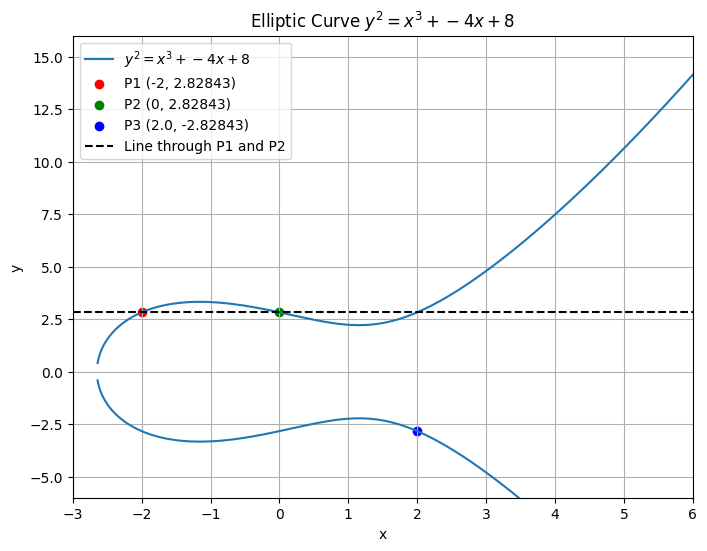

In [51]:
p1 = (-2, 2.82843)  
p2 = (0, 2.82843) 
p3 = point_addition(p1, p2)
expected_p3 = (2, -2.82843)
assert p3 == expected_p3
plot_elliptic_curve(a, b, points=[p1, p2, p3])


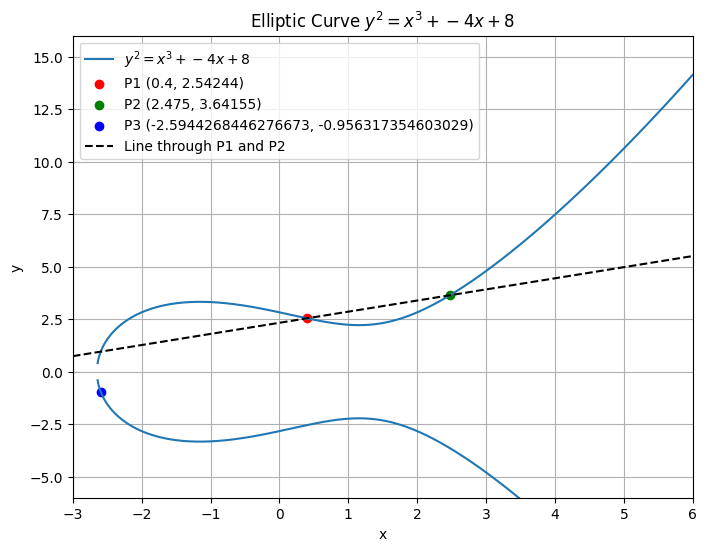

In [52]:
p1 = (0.4, 2.54244)  
p2 = (2.475, 3.64155) 
p3 = point_addition(p1, p2)
expected_p3 = (-2.5944268446276673, -0.956317354603029)
assert p3 == expected_p3
plot_elliptic_curve(a, b, points=[p1, p2, p3])


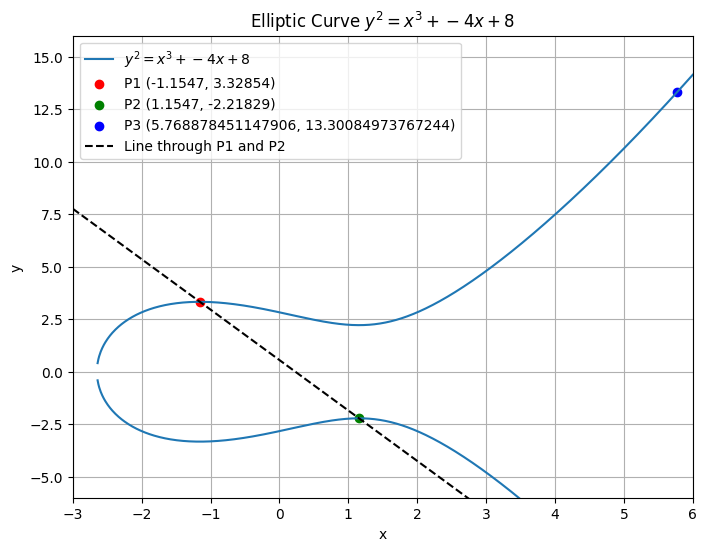

In [53]:
p1 = (-1.1547, 3.32854)  
p2 = (1.1547, -2.21829) 
p3 = point_addition(p1, p2)
expected_p3 = (5.768878451147906, 13.30084973767244)
assert p3 == expected_p3

plot_elliptic_curve(a, b, points=[p1, p2, p3])